In [5]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_statistic as ART_sta

import warnings
warnings.filterwarnings('ignore')

In [6]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5,  10,  20,  50, 100, 200]
Fi = 1 - 1/np.array(Tr)

In [7]:
COMPUTERNAME = os.environ['COMPUTERNAME']
print(f'Computer: {COMPUTERNAME}')

if COMPUTERNAME == 'BR_DELL':
    dir_font = os.path.join('/','run')
else:
    dir_font = os.path.join('/')

Computer: BR_DELL


In [8]:
veneto_dir = os.path.join(dir_font,'media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_clear.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [9]:
obs_base = os.path.join(dir_font,'media','arturo','T9','Data','Italy','Rain_Gauges_QC')
dir_base = os.path.join(dir_font,'media','arturo','T9','Data','Italy')

In [10]:
METADATA = pd.read_csv(os.path.join(obs_base, 'data', 'METADATA', 'METADATA_FTS_QCv4_Case1_wAIRHO_v3_1dy.csv'))
ISO_names = np.unique(METADATA.ISO.values)

In [11]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

## Relative Error Distribution

In [12]:
dir_ =os.path.join(dir_font,'media','arturo','T9','Data','Italy')

DF_IMERG = ART_sta.get_relative_error('IMERG',dir_)
DF_CMORPH = ART_sta.get_relative_error('CMORPH',dir_)
DF_MSWEP = ART_sta.get_relative_error('MSWEP',dir_)
DF_ERA5 = ART_sta.get_relative_error('ERA5',dir_)
DF_GSMaP = ART_sta.get_relative_error('GSMaP',dir_)
DF_CHIRPS = ART_sta.get_relative_error('CHIRPS',dir_)

DF_ENSEMBLE = ART_sta.get_relative_error('ENSEMBLE_ALL_mean',dir_)

In [13]:
len(DF_IMERG), len(DF_CMORPH), len(DF_MSWEP), len(DF_ERA5), len(DF_GSMaP), len(DF_CHIRPS), len(DF_ENSEMBLE)

(2688, 2688, 2688, 2688, 2688, 2688, 2688)

../figures/Article_down/Products_DOWN_RE_dist_median.png


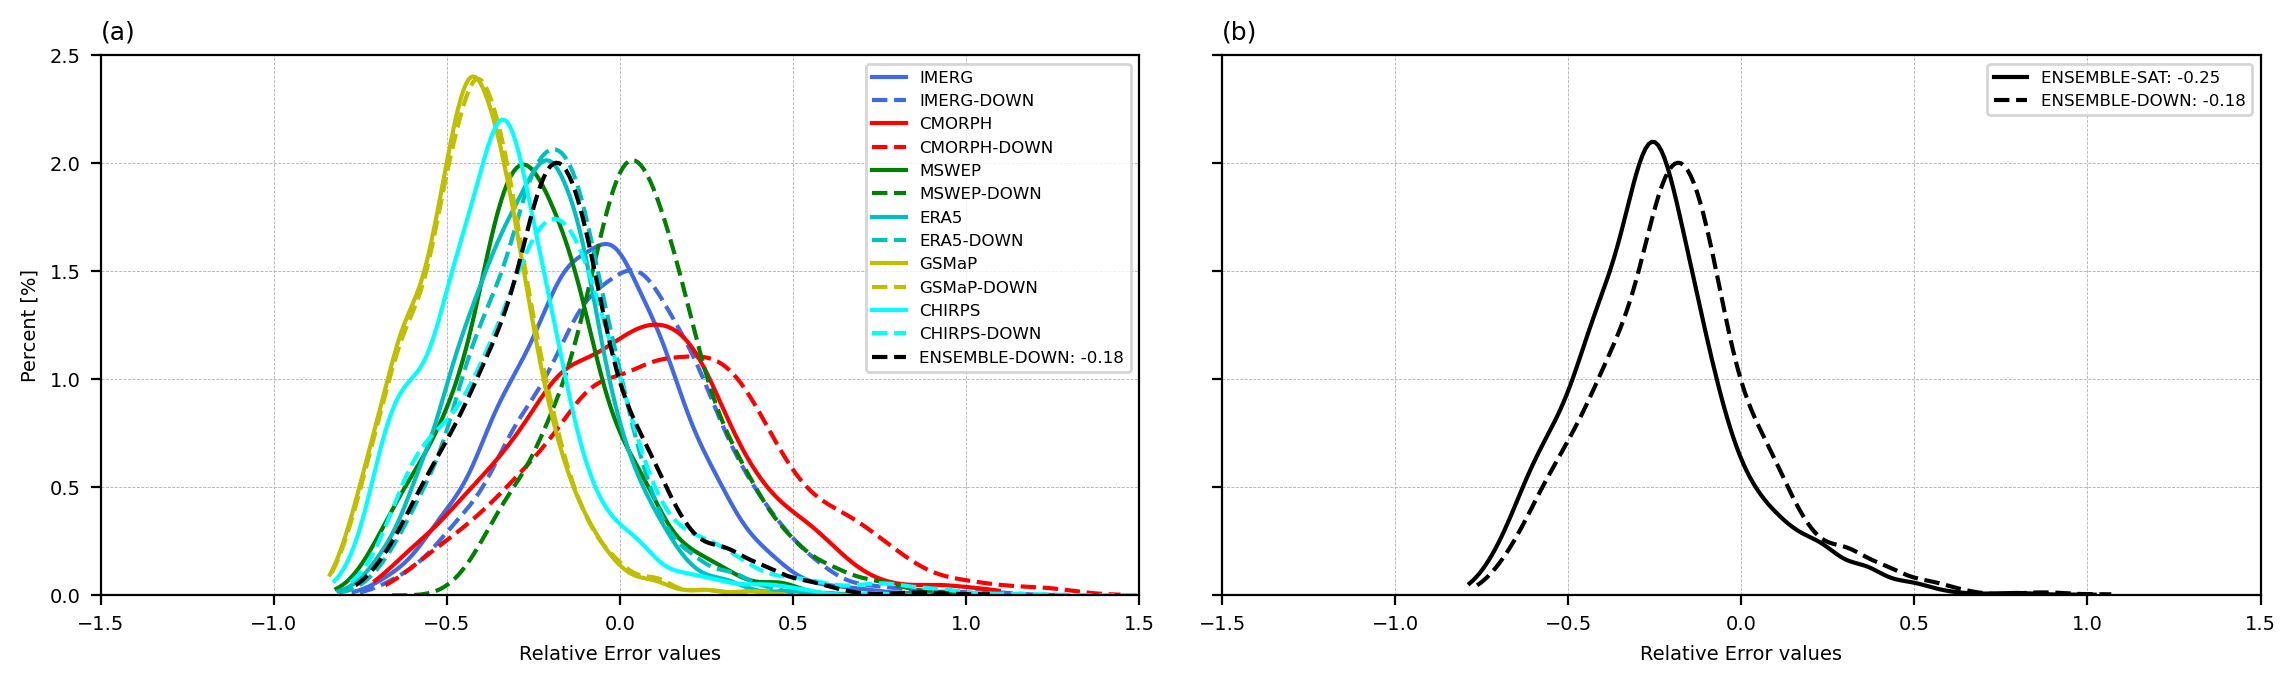

In [14]:
fig = plt.figure(figsize=(10,4),dpi=200)
gs = gridspec.GridSpec(1,2)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(DF_IMERG.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(DF_IMERG.RER)), np.nanmax(np.array(DF_IMERG.RER))))
sns.kdeplot(DF_IMERG.RED,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG-DOWN',
            clip=(np.nanmin(np.array(DF_IMERG.RED)), np.nanmax(np.array(DF_IMERG.RED))))

sns.kdeplot(DF_CMORPH.RER,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH',
            clip=(np.nanmin(np.array(DF_CMORPH.RER)), np.nanmax(np.array(DF_CMORPH.RER))))
sns.kdeplot(DF_CMORPH.RED,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH-DOWN',
            clip=(np.nanmin(np.array(DF_CMORPH.RED)), np.nanmax(np.array(DF_CMORPH.RED))))

sns.kdeplot(DF_MSWEP.RER,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP',
            clip=(np.nanmin(np.array(DF_MSWEP.RER)), np.nanmax(np.array(DF_MSWEP.RER))))
sns.kdeplot(DF_MSWEP.RED+0.3,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP-DOWN',
            clip=(np.nanmin(np.array(DF_MSWEP.RED)), np.nanmax(np.array(DF_MSWEP.RED))))

sns.kdeplot(DF_ERA5.RER,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5',
            clip=(np.nanmin(np.array(DF_ERA5.RER)), np.nanmax(np.array(DF_ERA5.RER))))
sns.kdeplot(DF_ERA5.RED,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5-DOWN',
            clip=(np.nanmin(np.array(DF_ERA5.RED)), np.nanmax(np.array(DF_ERA5.RED))))

sns.kdeplot(DF_GSMaP.RER,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP',
            clip=(np.nanmin(np.array(DF_GSMaP.RER)), np.nanmax(np.array(DF_GSMaP.RER))))
sns.kdeplot(DF_GSMaP.RED,color=colors[4], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP-DOWN',
            clip=(np.nanmin(np.array(DF_GSMaP.RED)), np.nanmax(np.array(DF_GSMaP.RED))))

sns.kdeplot(DF_CHIRPS.RER,color=colors[7],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS',
            clip=(np.nanmin(np.array(DF_CHIRPS.RER)), np.nanmax(np.array(DF_CHIRPS.RER))))
sns.kdeplot(DF_CHIRPS.RED,color=colors[7], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS-DOWN',
            clip=(np.nanmin(np.array(DF_CHIRPS.RED)), np.nanmax(np.array(DF_CHIRPS.RED))))

sns.kdeplot(DF_ENSEMBLE_MEAN.RED,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(DF_ENSEMBLE.RED),2)}',
            clip=(np.nanmin(np.array(DF_ENSEMBLE_MEAN.RED)), np.nanmax(np.array(DF_ENSEMBLE_MEAN.RED))))

ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.tick_params(axis='both', which='major', labelsize=7)

ax1.text(0.05, 0.92, '(a)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 1])

# sns.kdeplot(DF_ENSEMBLE.RER,color='k',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-SAT: {np.round(np.nanmean(DF_ENSEMBLE.RER),2)}',
#             clip=(np.nanmin(np.array(DF_ENSEMBLE.RER)), np.nanmax(np.array(DF_ENSEMBLE.RER))))
# sns.kdeplot(DF_ENSEMBLE.RED,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(DF_ENSEMBLE.RED),2)}',
#             clip=(np.nanmin(np.array(DF_ENSEMBLE.RED)), np.nanmax(np.array(DF_ENSEMBLE.RED))))

# ax1.set_xlabel('Relative Error values',fontsize=7)
# ax1.legend(fontsize=6, loc=0, ncol=1)
# ax1.grid(linewidth=0.3, linestyle='--')

# ax1.set_xlim(-1.5,1.5)
# ax1.set_ylim(0,2.5)
# ax1.set_yticklabels('')
# ax1.set_ylabel('')
# ax1.tick_params(axis='both', which='major', labelsize=7)
# ax1.set_title(f'(b)',fontsize=9, loc='left')

ax1.text(0.05, 0.92, '(b)', 
            fontsize=12, ha='center', va='center',
            transform=ax1.transAxes, zorder=20,
            bbox=dict(boxstyle="round,pad=0.3", 
                facecolor="white", 
                alpha=1,
                edgecolor="black",
                linewidth=0.5))

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.15)

salida = '../figures/Article_down/Products_DOWN_RE_dist_median.png'
print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Elevation Analysis

In [ ]:
QUARTILE_IMERG, QUARTILE_IMERG_M = ART_sta.DF_elevation(DF_IMERG)
QUARTILE_CMORPH, QUARTILE_CMORPH_M = ART_sta.DF_elevation(DF_CMORPH)
QUARTILE_MSWEP, QUARTILE_MSWEP_M = ART_sta.DF_elevation(DF_MSWEP)
QUARTILE_ERA5, QUARTILE_ERA5_M = ART_sta.DF_elevation(DF_ERA5)
QUARTILE_GSMaP, QUARTILE_GSMaP_M = ART_sta.DF_elevation(DF_GSMaP)
QUARTILE_CHIRPS, QUARTILE_CHIRPS_M = ART_sta.DF_elevation(DF_CHIRPS)

QUARTILE_ENSEMBLE, QUARTILE_ENSEMBLE_M = ART_sta.DF_elevation(DF_ENSEMBLE)

Export figure to: ../figures/Article_down/Elevation_groups.png


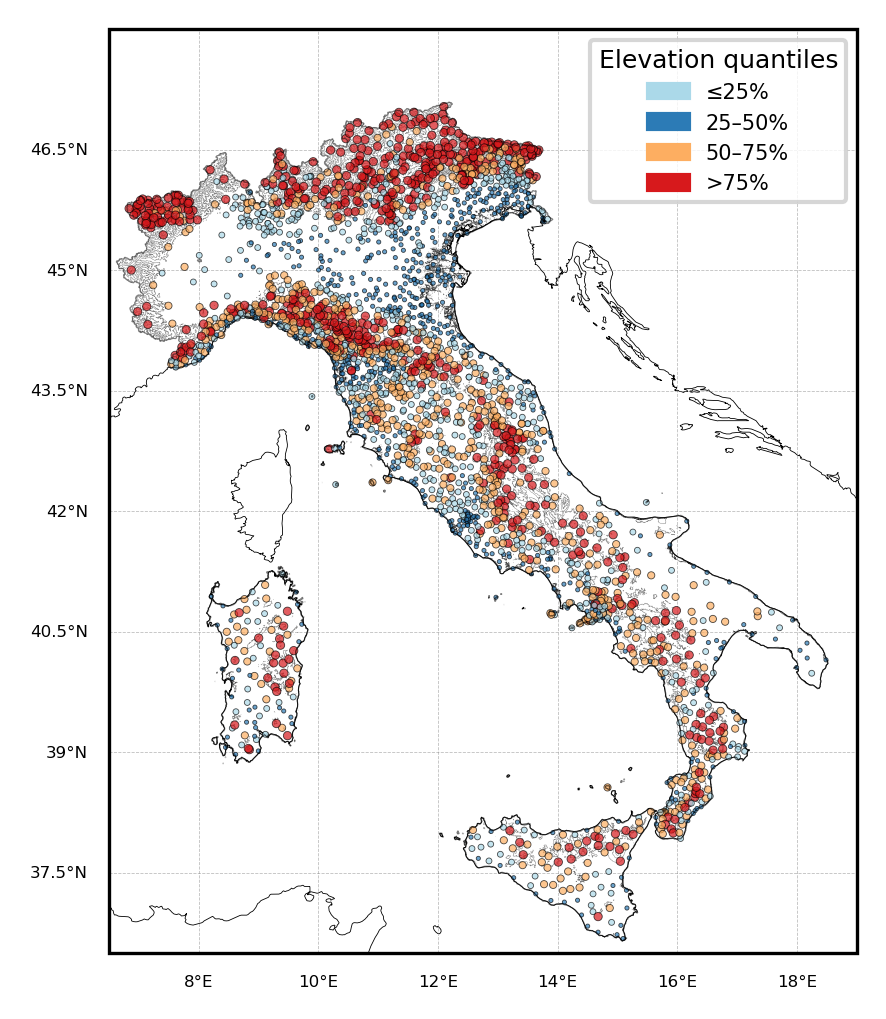

In [16]:
elev_cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ===========================================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,color='k')
# REGIONS.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)
ITALY.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.3, zorder=21, alpha=0.5)
DEM.plot(facecolor='None', edgecolor='k', ax=ax1, linewidth=0.1, zorder=2, alpha=0.5)

group_codes = DF_IMERG['ELEV_QUARTILE'].cat.codes

a1 = ax1.scatter(
    DF_IMERG['LON'],
    DF_IMERG['LAT'],
    c=DF_IMERG['ELEV_color'],
    s=DF_IMERG['ELEV_QUARTILEn'],
    alpha=0.7,
    zorder=20,
    edgecolor='k',
    linewidth=0.2
)

group_colors = {
    '≤25%':  '#abd9e9',
    '25–50%': '#2c7bb6',
    '50–75%': '#fdae61',
    '>75%':   '#d7191c'
}

legend_elements = [
    mpatches.Patch(color=color, label=label)
    for label, color in group_colors.items()
]

ax1.legend(
    handles=legend_elements,
    title='Elevation quantiles',
    loc='upper right',
    fontsize=5,
    title_fontsize=6,
    frameon=True
)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

# ===========================================================================================================================================
salida = os.path.join('..','figures','Article_down','Elevation_groups.png')
print(f'Export figure to: {salida}')
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Scatter plot

In [17]:
# from scipy.stats import pearsonr
# def NAN_spearman(DF):
#     mask = np.where((~np.isnan(DF.OBS.values))&(~np.isnan(DF.DOWN.values)))
#     corr_, _ = pearsonr(DF.OBS.values[mask], DF.DOWN.values[mask])
#     return float(np.round(corr_,3))

# from sklearn.linear_model import LinearRegression
# def linear_regression(DF):
#     OBS = DF.OBS.values
#     DOWN = DF.DOWN.values
#     mask = ~np.isnan(OBS) & ~np.isnan(DOWN)
#     obs_clean = OBS[mask].reshape(-1, 1) 
#     down_clean = DOWN[mask]

#     reg = LinearRegression()
#     reg.fit(obs_clean, down_clean)

#     # Obtener el slope (pendiente)
#     slope = reg.coef_[0]
#     intercept = reg.intercept_
    
#     x_line = np.linspace(np.min(obs_clean), np.max(obs_clean), 100).reshape(-1, 1)
#     y_line = reg.predict(x_line)

#     return x_line, y_line, slope

In [18]:
corr_IMERG = ART_sta.NAN_spearman(DF_IMERG)
corr_CMORPH = ART_sta.NAN_spearman(DF_CMORPH)
corr_MSWEP = ART_sta.NAN_spearman(DF_MSWEP)
corr_ERA5 = ART_sta.NAN_spearman(DF_ERA5)
corr_GSMaP = ART_sta.NAN_spearman(DF_GSMaP)
corr_CHIRPS = ART_sta.NAN_spearman(DF_CHIRPS)

In [19]:
IMERG_x, IMERG_y, IMERG_slope = ART_sta.linear_regression(DF_IMERG)
CMORPH_x, CMORPH_y, CMORPH_slope = ART_sta.linear_regression(DF_CMORPH)
MSWEP_x, MSWEP_y, MSWEP_slope = ART_sta.linear_regression(DF_MSWEP)
ERA5_x, ERA5_y, ERA5_slope = ART_sta.linear_regression(DF_ERA5)
GSMaP_x, GSMaP_y, GSMaP_slope = ART_sta.linear_regression(DF_GSMaP)
CHIRPS_x, CHIRPS_y, CHIRPS_slope = ART_sta.linear_regression(DF_CHIRPS)

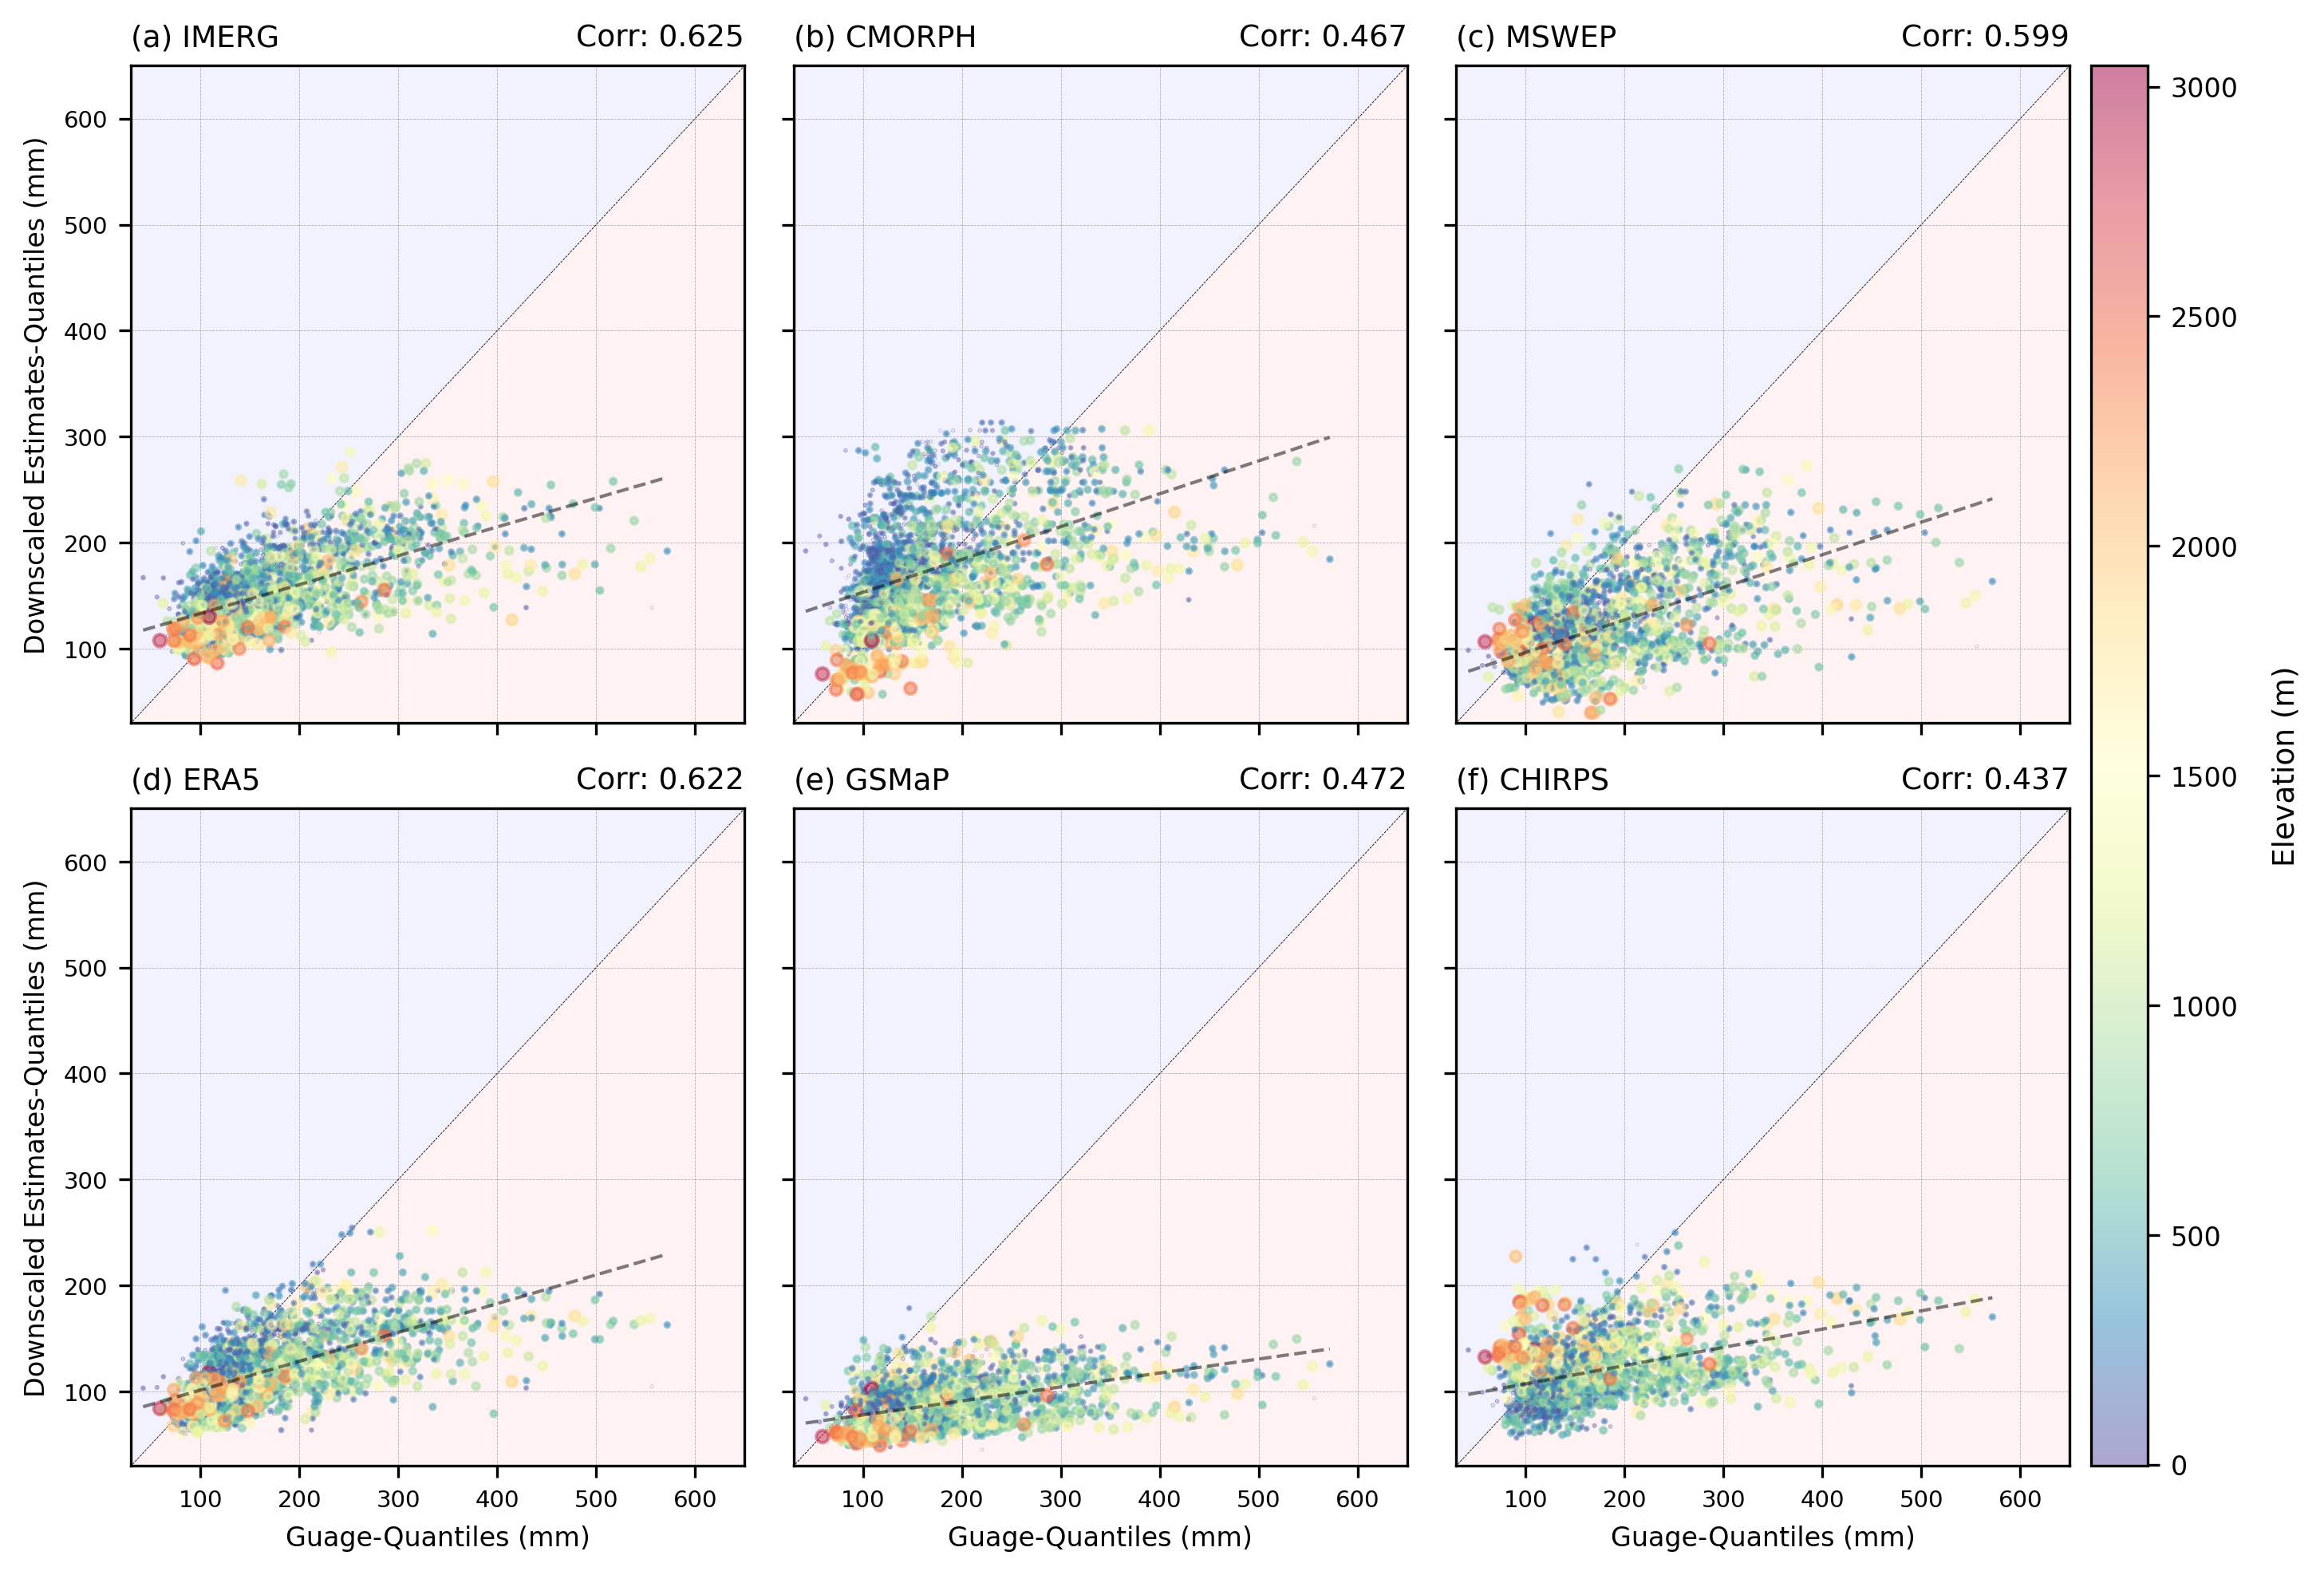

In [20]:
val_max = 600
vmin = DF_IMERG.ELEV.min()
vmax = DF_IMERG.ELEV.max()

fig = plt.figure(figsize=(9,6.5),dpi=300)
gs = gridspec.GridSpec(2, 3)

# ==========================================================================================================
axes = {}
pos = 0
for nrow in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nrow, ncol])
        ax.grid(linewidth=0.3, linestyle='--')
        ax.set_xlim(30,val_max+50)
        ax.set_ylim(30,val_max+50)
        ax.grid(linestyle='--', linewidth=0.2)
        ax.tick_params(axis='both', which='major', labelsize=7)
        
        ax.plot(np.arange(val_max+50),np.arange(val_max+50),'--k', linewidth=0.2, label='Identity line')
        ax.scatter([],[], s=5, c='darkred', label='Ensemble Satellite')
        ax.scatter([],[], s=5, c='darkblue', label='Ensemble Downscaled')

        if ncol > 0:
            ax.set_yticklabels([])
        if nrow == 0:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel('Guage-Quantiles (mm)',fontsize=8)
        if ncol == 0:
            ax.set_ylabel('Downscaled Estimates-Quantiles (mm)',fontsize=8)

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        x_vals = np.linspace(min(xlim[0], ylim[0]), max(xlim[1], ylim[1]), 200)
        ax.fill_between(x_vals, ylim[0], x_vals, facecolor="red", alpha=0.05, zorder=0)
        ax.fill_between(x_vals, x_vals, ylim[1], facecolor="blue", alpha=0.05, zorder=0)

        axes[(nrow, ncol)] = ax

# ==========================================================================================================
a1 = axes[(0, 0)].scatter(
    DF_IMERG.OBS, DF_IMERG.DOWN,
    alpha=0.5,
    s=DF_IMERG.ELEVn*15,
    c=DF_IMERG.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(0, 0)].plot(IMERG_x, IMERG_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(0, 0)].set_title('(a) IMERG', loc='left', fontsize=9)
axes[(0, 0)].set_title(f'Corr: {corr_IMERG}', loc='right', fontsize=9)

# ==========================================================================================================
a2 = axes[(0, 1)].scatter(
    DF_CMORPH.OBS, DF_CMORPH.DOWN,
    alpha=0.5,
    s=DF_CMORPH.ELEVn*15,
    c=DF_CMORPH.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(0, 1)].plot(CMORPH_x, CMORPH_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(0, 1)].set_title('(b) CMORPH', loc='left', fontsize=9)
axes[(0, 1)].set_title(f'Corr: {corr_CMORPH}', loc='right', fontsize=9)

# ==========================================================================================================
a2 = axes[(0, 2)].scatter(
    DF_MSWEP.OBS, DF_MSWEP.DOWN,
    alpha=0.5,
    s=DF_MSWEP.ELEVn*15,
    c=DF_MSWEP.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(0, 2)].plot(MSWEP_x, MSWEP_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(0, 2)].set_title('(c) MSWEP', loc='left', fontsize=9)
axes[(0, 2)].set_title(f'Corr: {corr_MSWEP}', loc='right', fontsize=9)

# ==========================================================================================================
a2 = axes[(1, 0)].scatter(
    DF_ERA5.OBS, DF_ERA5.DOWN,
    alpha=0.5,
    s=DF_ERA5.ELEVn*15,
    c=DF_ERA5.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(1, 0)].plot(ERA5_x, ERA5_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(1, 0)].set_title('(d) ERA5', loc='left', fontsize=9)
axes[(1, 0)].set_title(f'Corr: {corr_ERA5}', loc='right', fontsize=9)

# ==========================================================================================================
a2 = axes[(1, 1)].scatter(
    DF_GSMaP.OBS, DF_GSMaP.DOWN,
    alpha=0.5,
    s=DF_GSMaP.ELEVn*15,
    c=DF_GSMaP.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(1, 1)].plot(GSMaP_x, GSMaP_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(1, 1)].set_title('(e) GSMaP', loc='left', fontsize=9)
axes[(1, 1)].set_title(f'Corr: {corr_GSMaP}', loc='right', fontsize=9)

# ==========================================================================================================
a2 = axes[(1, 2)].scatter(
    DF_CHIRPS.OBS, DF_CHIRPS.DOWN,
    alpha=0.5,
    s=DF_CHIRPS.ELEVn*15,
    c=DF_CHIRPS.ELEV,
    vmin=vmin, vmax=vmax,
    zorder=10, cmap="Spectral_r")
axes[(1, 2)].plot(CHIRPS_x, CHIRPS_y, "--k", linewidth=1, label="Linear Fit", alpha=0.5,zorder=12)
axes[(1, 2)].set_title('(f) CHIRPS', loc='left', fontsize=9)
axes[(1, 2)].set_title(f'Corr: {corr_CHIRPS}', loc='right', fontsize=9)

# ==========================================================================================================
# ==========================================================================================================
cbar_ax = fig.add_axes([0.96, 0.05, 0.026, 0.9])#0.96
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=8)
cbar.set_label("Elevation (m)", fontsize=9, labelpad=10) 

# ==========================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.13)

## Elevation Analysis

In [21]:
DF_LIST = [DF_IMERG, DF_CMORPH, DF_MSWEP, DF_ERA5, DF_GSMaP, DF_CHIRPS]
names_list = ['IMERG', 'CMORPH', 'MSWEP', 'ERA5', 'GSMaP', 'CHIRPS']
letters_list = ['(a)','(b)','(c)','(d)','(e)','(f)']

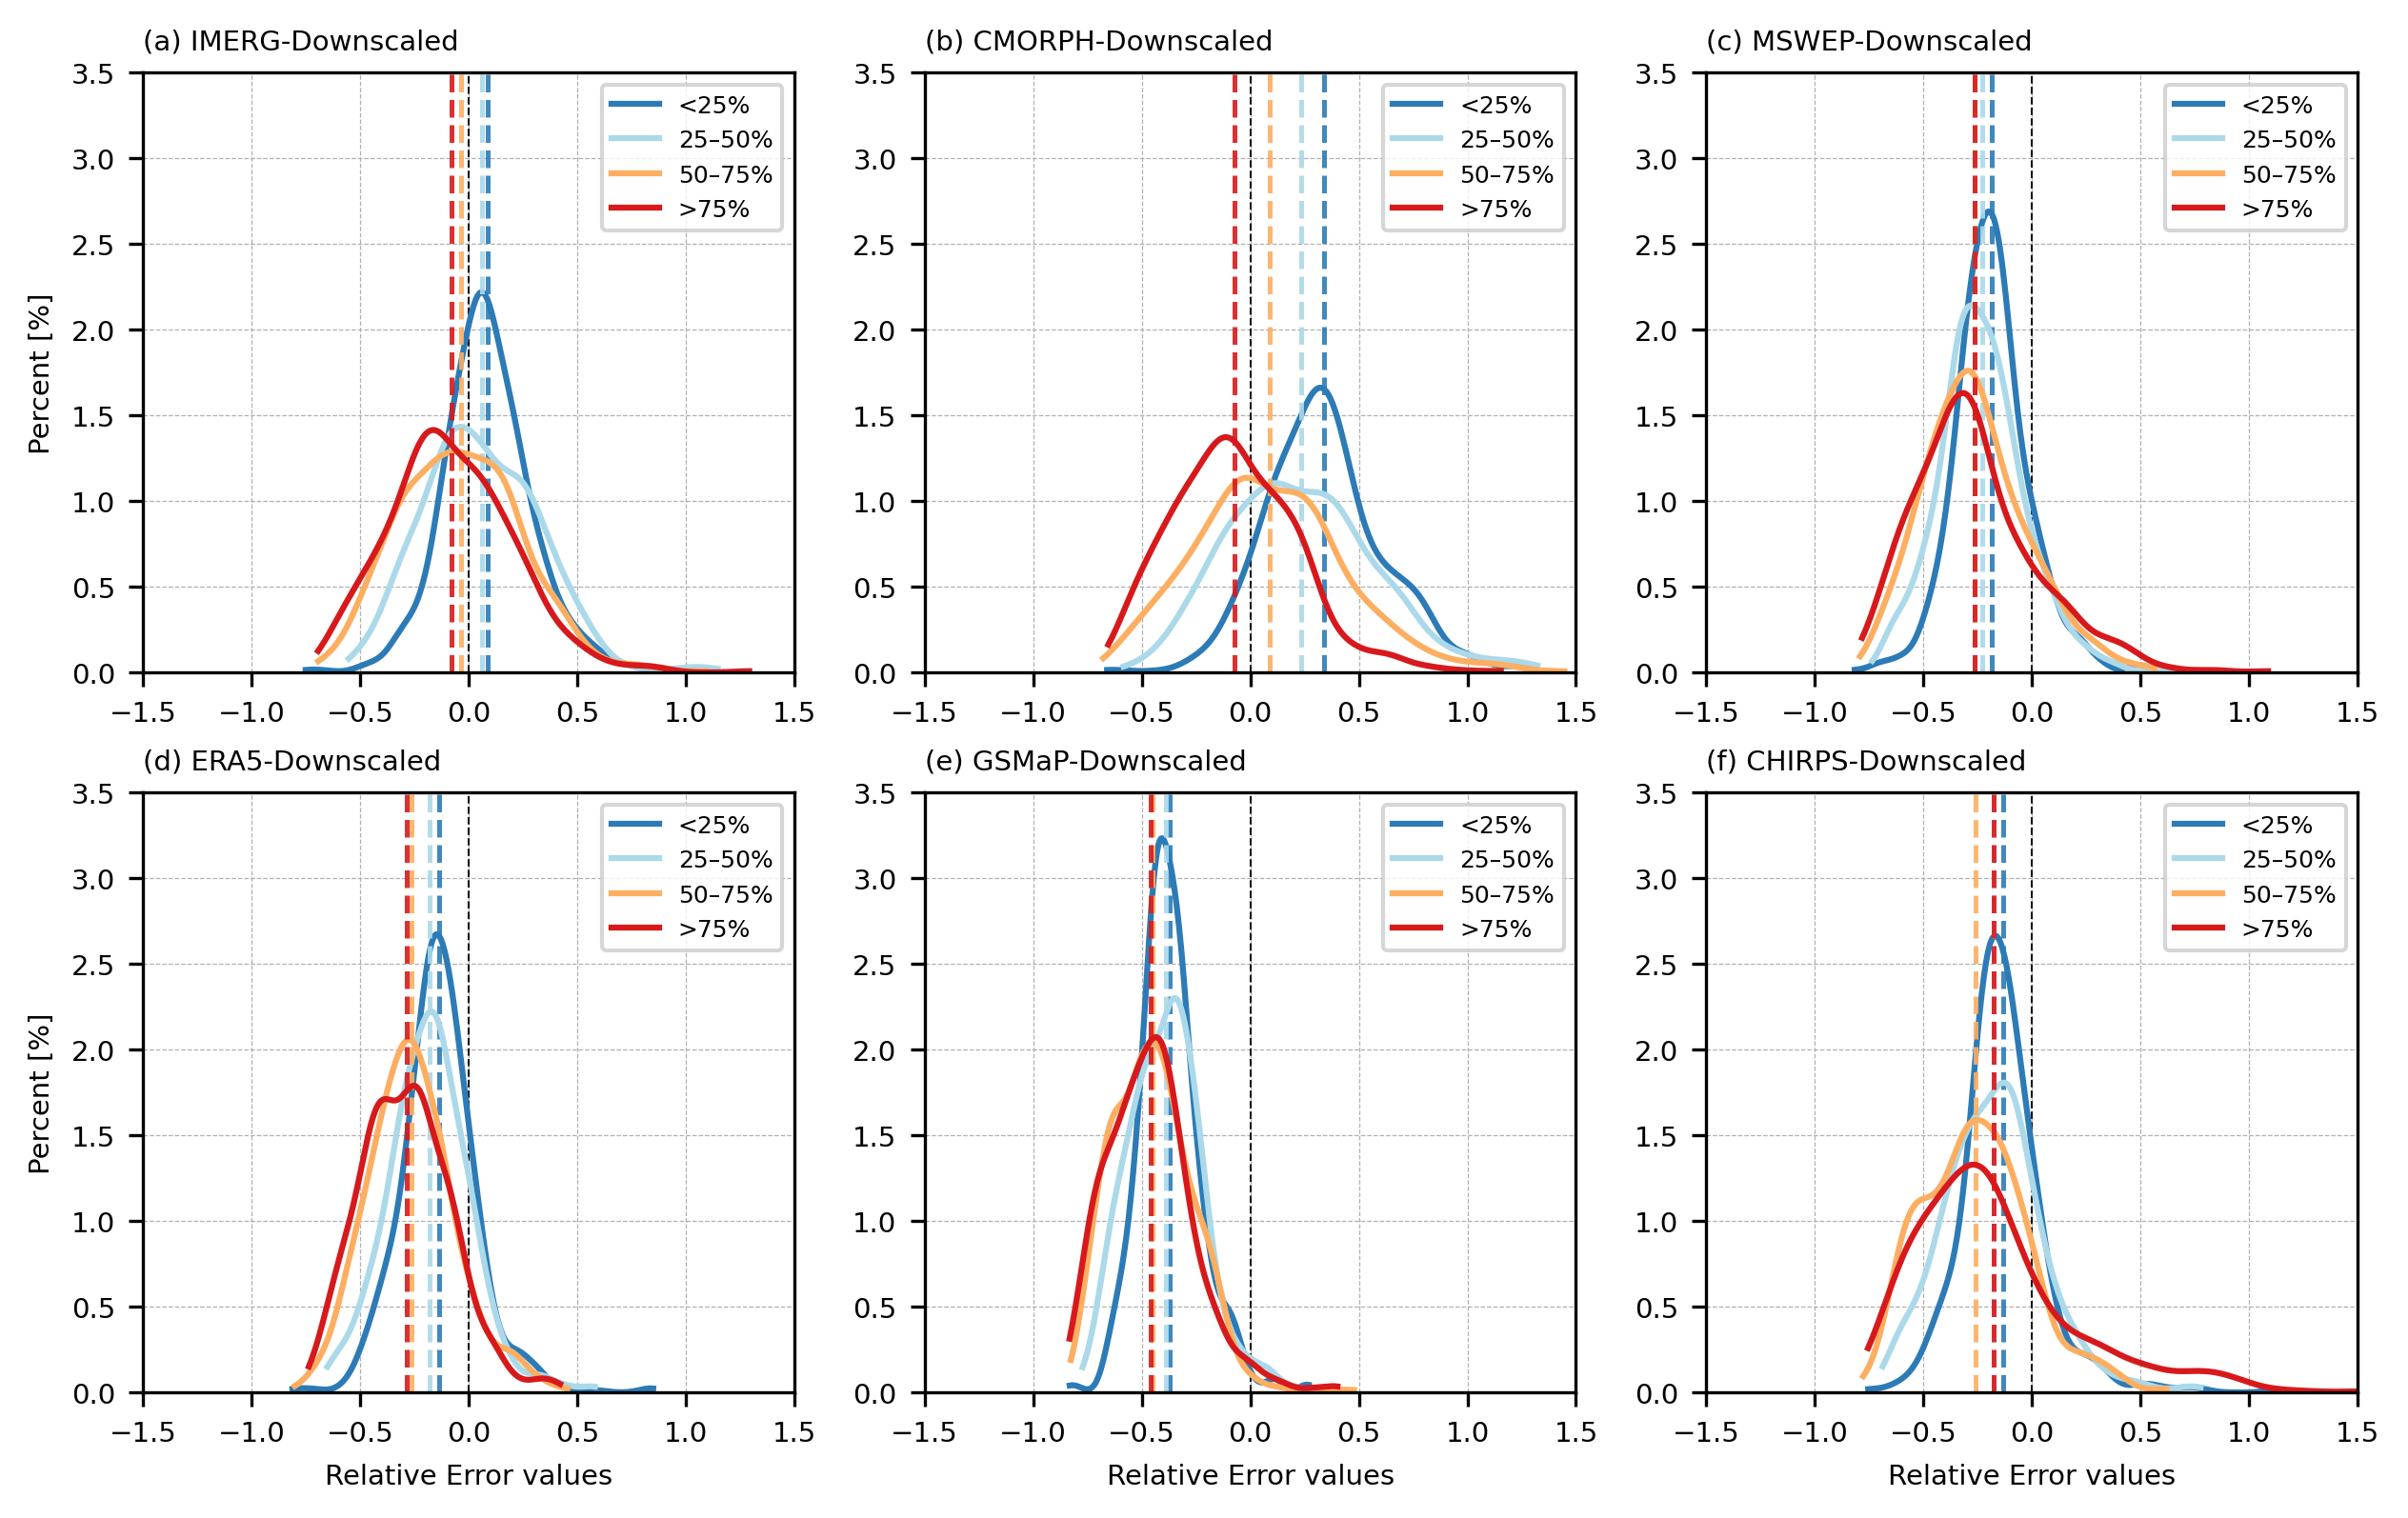

In [22]:
fig = plt.figure(figsize=(10, 6), dpi=300)
gs = gridspec.GridSpec(2, 3)

# ============================================================================================================================
axes = {}
pos = 0
for nrow in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nrow, ncol])
        ax.legend(fontsize=6, loc=0, ncol=1)
        ax.grid(linewidth=0.3, linestyle='--')
        ax.set_xlim(-1.5,1.5)
        ax.set_ylim(0,3.5)
        ax.tick_params(axis='both', which='major', labelsize=7)
        ax.set_xlabel(' ',fontsize=7)
        if ncol == 0  and nrow < 2:
            ax.set_ylabel('Percent [%]',fontsize=7)
        else:
            ax.set_ylabel(' ',fontsize=7)
        if nrow == 1:
            ax.set_xlabel('Relative Error values',fontsize=7)
        ax.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)

        ax.set_title(f'{letters_list[pos]} {names_list[pos]}-Downscaled', fontsize=7, loc='left')
        pos += 1

        axes[(nrow, ncol)] = ax

# ==============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[0].RED)), np.nanmax(np.array(QUARTILE_IMERG[0].RED))))
axes[(0, 0)].axvline(QUARTILE_IMERG_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_IMERG[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[1].RED)), np.nanmax(np.array(QUARTILE_IMERG[1].RED))))
axes[(0, 0)].axvline(QUARTILE_IMERG_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_IMERG[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[2].RED)), np.nanmax(np.array(QUARTILE_IMERG[2].RED))))
axes[(0, 0)].axvline(QUARTILE_IMERG_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_IMERG[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[3].RED)), np.nanmax(np.array(QUARTILE_IMERG[3].RED))))
axes[(0, 0)].axvline(QUARTILE_IMERG_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(0, 0)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_CMORPH[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[0].RED)), np.nanmax(np.array(QUARTILE_CMORPH[0].RED))))
axes[(0, 1)].axvline(QUARTILE_CMORPH_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CMORPH[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[1].RED)), np.nanmax(np.array(QUARTILE_CMORPH[1].RED))))
axes[(0, 1)].axvline(QUARTILE_CMORPH_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CMORPH[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[2].RED)), np.nanmax(np.array(QUARTILE_CMORPH[2].RED))))
axes[(0, 1)].axvline(QUARTILE_CMORPH_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CMORPH[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[3].RED)), np.nanmax(np.array(QUARTILE_CMORPH[3].RED))))
axes[(0, 1)].axvline(QUARTILE_CMORPH_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(0, 1)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_MSWEP[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 2)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[0].RED)), np.nanmax(np.array(QUARTILE_MSWEP[0].RED))))
axes[(0, 2)].axvline(QUARTILE_MSWEP_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_MSWEP[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 2)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[1].RED)), np.nanmax(np.array(QUARTILE_MSWEP[1].RED))))
axes[(0, 2)].axvline(QUARTILE_MSWEP_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_MSWEP[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 2)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[2].RED)), np.nanmax(np.array(QUARTILE_MSWEP[2].RED))))
axes[(0, 2)].axvline(QUARTILE_MSWEP_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_MSWEP[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(0, 2)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[3].RED)), np.nanmax(np.array(QUARTILE_MSWEP[3].RED))))
axes[(0, 2)].axvline(QUARTILE_MSWEP_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(0, 2)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_ERA5[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[0].RED)), np.nanmax(np.array(QUARTILE_ERA5[0].RED))))
axes[(1, 0)].axvline(QUARTILE_ERA5_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_ERA5[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[1].RED)), np.nanmax(np.array(QUARTILE_ERA5[1].RED))))
axes[(1, 0)].axvline(QUARTILE_ERA5_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_ERA5[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[2].RED)), np.nanmax(np.array(QUARTILE_ERA5[2].RED))))
axes[(1, 0)].axvline(QUARTILE_ERA5_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_ERA5[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[3].RED)), np.nanmax(np.array(QUARTILE_ERA5[3].RED))))
axes[(1, 0)].axvline(QUARTILE_ERA5_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(1, 0)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_GSMaP[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[0].RED)), np.nanmax(np.array(QUARTILE_GSMaP[0].RED))))
axes[(1, 1)].axvline(QUARTILE_GSMaP_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_GSMaP[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[1].RED)), np.nanmax(np.array(QUARTILE_GSMaP[1].RED))))
axes[(1, 1)].axvline(QUARTILE_GSMaP_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_GSMaP[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[2].RED)), np.nanmax(np.array(QUARTILE_GSMaP[2].RED))))
axes[(1, 1)].axvline(QUARTILE_GSMaP_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_GSMaP[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[3].RED)), np.nanmax(np.array(QUARTILE_GSMaP[3].RED))))
axes[(1, 1)].axvline(QUARTILE_GSMaP_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(1, 1)].legend(fontsize=6, loc=0, ncol=1)

# ==============================================================================================================================
sns.kdeplot(QUARTILE_CHIRPS[0].RED,color='#2c7bb6',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 2)],label=f'<25%',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[0].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[0].RED))))
axes[(1, 2)].axvline(QUARTILE_CHIRPS_M[0], color='#2c7bb6',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CHIRPS[1].RED,color='#abd9e9',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 2)],label=f'25–50%',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[1].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[1].RED))))
axes[(1, 2)].axvline(QUARTILE_CHIRPS_M[1], color='#abd9e9',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CHIRPS[2].RED,color='#fdae61',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 2)],label=f'50–75%',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[2].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[2].RED))))
axes[(1, 2)].axvline(QUARTILE_CHIRPS_M[2], color='#fdae61',linestyle='--',linewidth=1.2,alpha=0.9)

sns.kdeplot(QUARTILE_CHIRPS[3].RED,color='#d7191c',cumulative=False,fill=False,multiple="stack",ax=axes[(1, 2)],label=f'>75%',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[3].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[3].RED))))
axes[(1, 2)].axvline(QUARTILE_CHIRPS_M[3], color='#d7191c',linestyle='--',linewidth=1.2,alpha=0.9)

axes[(1, 2)].legend(fontsize=6, loc=0, ncol=1)


# # ============================================================================================================================
# cbar_ax = fig.add_axes([0.96, 0.05, 0.026, 0.9])#0.96
# cbar = fig.colorbar(a1, cax=cbar_ax, orientation='vertical')
# cbar.ax.tick_params(labelsize=8)
# cbar.set_label("Elevation (m)", fontsize=9, labelpad=10)  

# # ============================================================================================================================
# plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.13)

# salida = '../figures/Article_down/Scatter_ALL.png'
# print(salida)
# # plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

Text(0.0, 1.0, '(d) >75% (~ 677 m)')

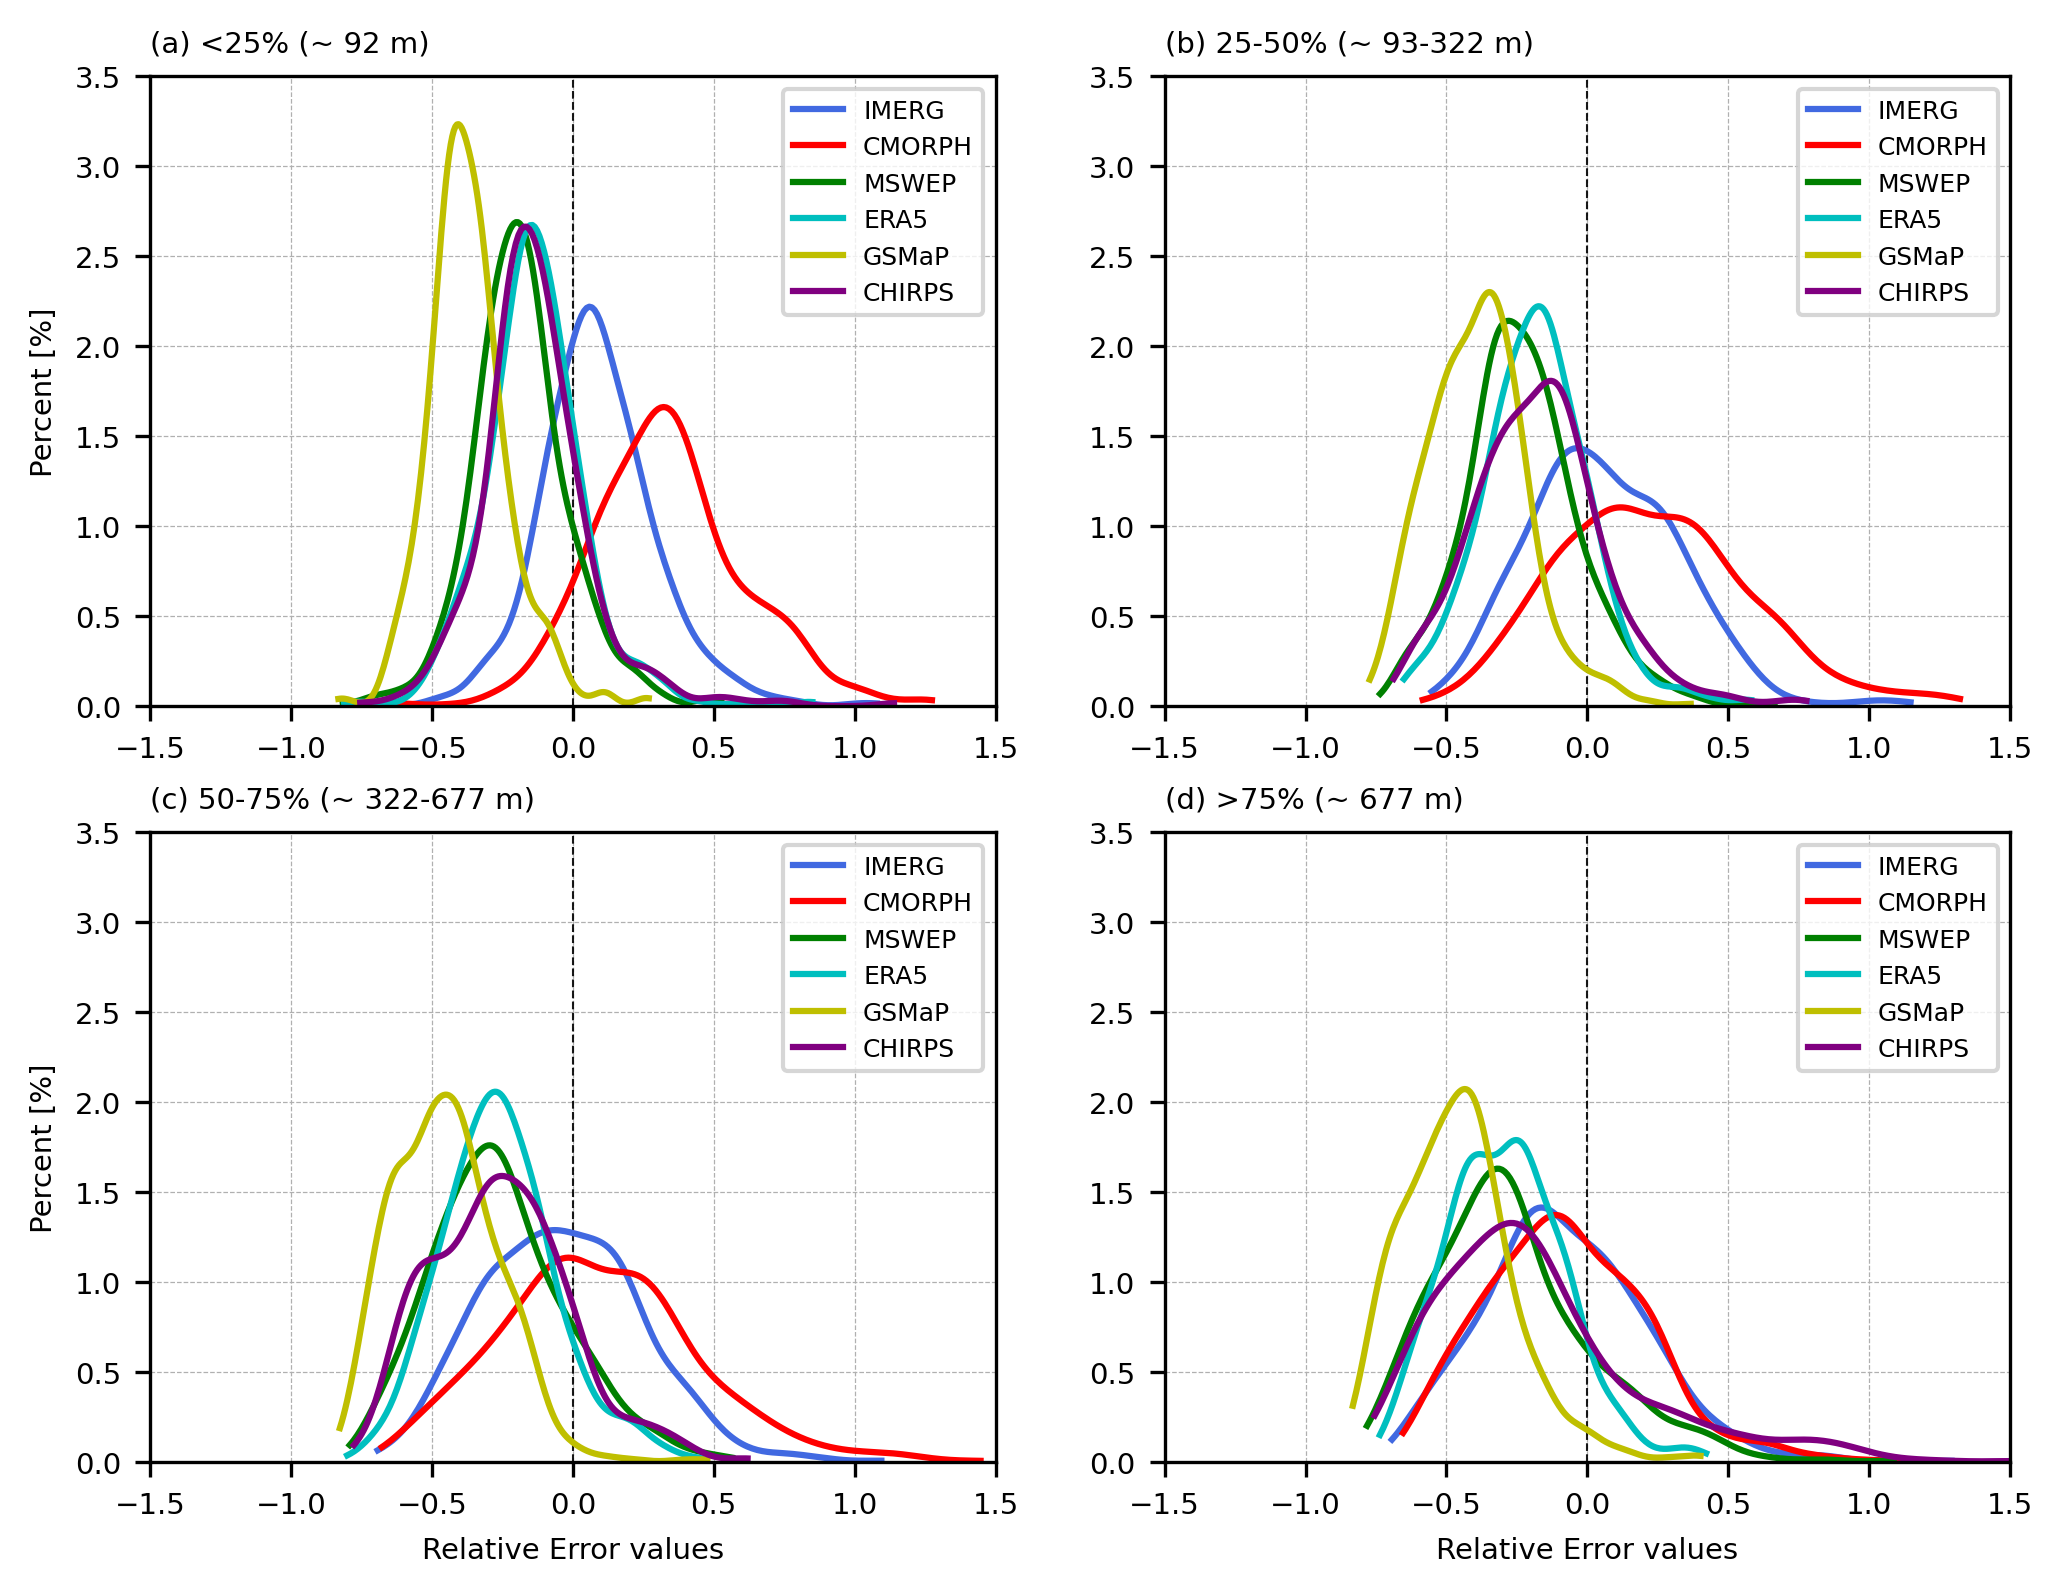

In [23]:
fig = plt.figure(figsize=(8, 6), dpi=300)
gs = gridspec.GridSpec(2, 2)

# ============================================================================================================================
axes = {}
for nrow in range(2):
    for ncol in range(2):
        ax = fig.add_subplot(gs[nrow, ncol])
        ax.legend(fontsize=6, loc=0, ncol=1)
        ax.grid(linewidth=0.3, linestyle='--')
        ax.set_xlim(-1.5,1.5)
        ax.set_ylim(0,3.5)
        ax.tick_params(axis='both', which='major', labelsize=7)
        ax.set_xlabel(' ',fontsize=7)
        if ncol == 0  and nrow < 2:
            ax.set_ylabel('Percent [%]',fontsize=7)
        else:
            ax.set_ylabel(' ',fontsize=7)
        if nrow == 1:
            ax.set_xlabel('Relative Error values',fontsize=7)
        ax.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)

        axes[(nrow, ncol)] = ax

# ============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[0].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'IMERG',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[0].RED)), np.nanmax(np.array(QUARTILE_IMERG[0].RED))))
sns.kdeplot(QUARTILE_CMORPH[0].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'CMORPH',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[0].RED)), np.nanmax(np.array(QUARTILE_CMORPH[0].RED))))
sns.kdeplot(QUARTILE_MSWEP[0].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'MSWEP',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[0].RED)), np.nanmax(np.array(QUARTILE_MSWEP[0].RED))))
sns.kdeplot(QUARTILE_ERA5[0].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'ERA5',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[0].RED)), np.nanmax(np.array(QUARTILE_ERA5[0].RED))))
sns.kdeplot(QUARTILE_GSMaP[0].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'GSMaP',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[0].RED)), np.nanmax(np.array(QUARTILE_GSMaP[0].RED))))
sns.kdeplot(QUARTILE_CHIRPS[0].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[0].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[0].RED))))
axes[(0, 0)].legend(fontsize=6, loc=0, ncol=1)
axes[(0, 0)].set_title(f'(a) <25% (~ {int(QUARTILE_IMERG[0].ELEV.max())} m)', fontsize=7, loc='left')

# ============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[1].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'IMERG',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[1].RED)), np.nanmax(np.array(QUARTILE_IMERG[1].RED))))
sns.kdeplot(QUARTILE_CMORPH[1].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'CMORPH',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[1].RED)), np.nanmax(np.array(QUARTILE_CMORPH[1].RED))))
sns.kdeplot(QUARTILE_MSWEP[1].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'MSWEP',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[1].RED)), np.nanmax(np.array(QUARTILE_MSWEP[1].RED))))
sns.kdeplot(QUARTILE_ERA5[1].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'ERA5',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[1].RED)), np.nanmax(np.array(QUARTILE_ERA5[1].RED))))
sns.kdeplot(QUARTILE_GSMaP[1].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'GSMaP',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[1].RED)), np.nanmax(np.array(QUARTILE_GSMaP[1].RED))))
sns.kdeplot(QUARTILE_CHIRPS[1].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[1].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[1].RED))))
axes[(0, 1)].legend(fontsize=6, loc=0, ncol=1)
axes[(0, 1)].set_title(f'(b) 25-50% (~ {int(QUARTILE_IMERG[1].ELEV.min())}-{int(QUARTILE_IMERG[1].ELEV.max())} m)', fontsize=7, loc='left')

# ============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[2].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'IMERG',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[2].RED)), np.nanmax(np.array(QUARTILE_IMERG[2].RED))))
sns.kdeplot(QUARTILE_CMORPH[2].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'CMORPH',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[2].RED)), np.nanmax(np.array(QUARTILE_CMORPH[2].RED))))
sns.kdeplot(QUARTILE_MSWEP[2].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'MSWEP',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[2].RED)), np.nanmax(np.array(QUARTILE_MSWEP[2].RED))))
sns.kdeplot(QUARTILE_ERA5[2].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'ERA5',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[2].RED)), np.nanmax(np.array(QUARTILE_ERA5[2].RED))))
sns.kdeplot(QUARTILE_GSMaP[2].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'GSMaP',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[2].RED)), np.nanmax(np.array(QUARTILE_GSMaP[2].RED))))
sns.kdeplot(QUARTILE_CHIRPS[2].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[2].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[2].RED))))
axes[(1, 0)].legend(fontsize=6, loc=0, ncol=1)
axes[(1, 0)].set_title(f'(c) 50-75% (~ {int(QUARTILE_IMERG[2].ELEV.min())}-{int(QUARTILE_IMERG[2].ELEV.max())} m)', fontsize=7, loc='left')

# ============================================================================================================================
sns.kdeplot(QUARTILE_IMERG[3].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'IMERG',
            clip=(np.nanmin(np.array(QUARTILE_IMERG[3].RED)), np.nanmax(np.array(QUARTILE_IMERG[3].RED))))
sns.kdeplot(QUARTILE_CMORPH[3].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'CMORPH',
            clip=(np.nanmin(np.array(QUARTILE_CMORPH[3].RED)), np.nanmax(np.array(QUARTILE_CMORPH[3].RED))))
sns.kdeplot(QUARTILE_MSWEP[3].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'MSWEP',
            clip=(np.nanmin(np.array(QUARTILE_MSWEP[3].RED)), np.nanmax(np.array(QUARTILE_MSWEP[3].RED))))
sns.kdeplot(QUARTILE_ERA5[3].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'ERA5',
            clip=(np.nanmin(np.array(QUARTILE_ERA5[3].RED)), np.nanmax(np.array(QUARTILE_ERA5[3].RED))))
sns.kdeplot(QUARTILE_GSMaP[3].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'GSMaP',
            clip=(np.nanmin(np.array(QUARTILE_GSMaP[3].RED)), np.nanmax(np.array(QUARTILE_GSMaP[3].RED))))
sns.kdeplot(QUARTILE_CHIRPS[3].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(QUARTILE_CHIRPS[3].RED)), np.nanmax(np.array(QUARTILE_CHIRPS[3].RED))))
axes[(1, 1)].legend(fontsize=6, loc=0, ncol=1)
axes[(1, 1)].set_title(f'(d) >75% (~ {int(QUARTILE_IMERG[3].ELEV.min())} m)', fontsize=7, loc='left')


## Test elevation using K-means

In [24]:
KMEANS_IMERG, KMEANS_IMERG_M = ART_sta.elevation_kmeans_robusto(DF_IMERG)
KMEANS_CMORPH, KMEANS_CMORPH_M = ART_sta.elevation_kmeans_robusto(DF_CMORPH)
KMEANS_MSWEP, KMEANS_MSWEP_M = ART_sta.elevation_kmeans_robusto(DF_MSWEP)
KMEANS_ERA5, KMEANS_ERA5_M = ART_sta.elevation_kmeans_robusto(DF_ERA5)
KMEANS_GSMaP, KMEANS_GSMaP_M = ART_sta.elevation_kmeans_robusto(DF_GSMaP)
KMEANS_CHIRPS, KMEANS_CHIRPS_M = ART_sta.elevation_kmeans_robusto(DF_CHIRPS)

## Elevation Groups Comparison

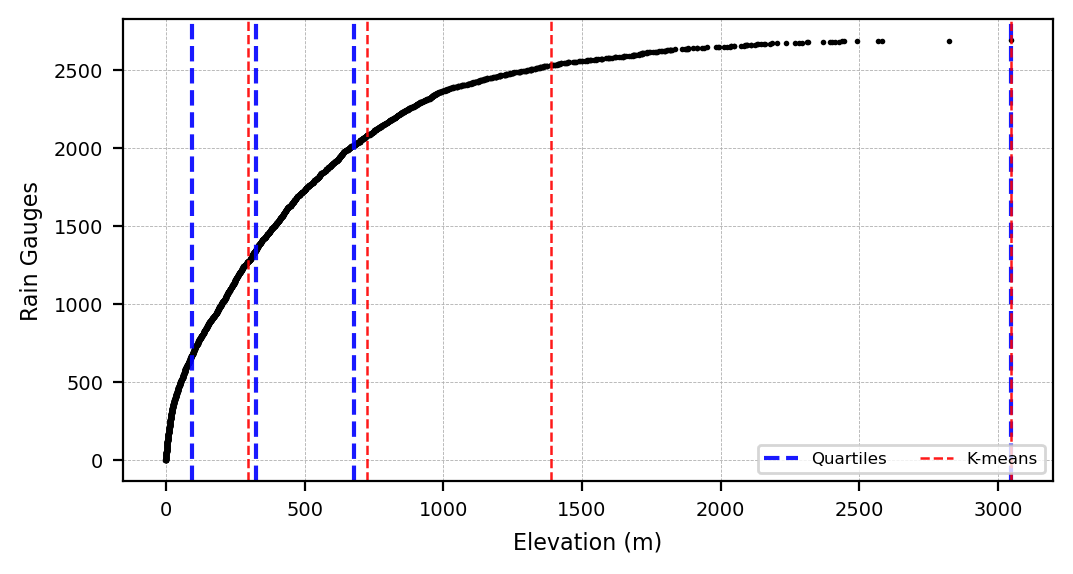

In [50]:
lw_quartile = 1.5
lw_kmeans = 0.9

fig = plt.figure(figsize=(6,3),dpi=200)
gs = gridspec.GridSpec(1,1)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.plot(np.sort(DF_IMERG.ELEV), np.arange(len(DF_IMERG)), '.', markersize=2, color='k')

ax1.axvline(QUARTILE_IMERG[0].ELEV.max(), color='b',linestyle='--',linewidth=lw_quartile,alpha=0.9, label='Quartiles')
ax1.axvline(QUARTILE_IMERG[1].ELEV.max(), color='b',linestyle='--',linewidth=lw_quartile,alpha=0.9)
ax1.axvline(QUARTILE_IMERG[2].ELEV.max(), color='b',linestyle='--',linewidth=lw_quartile,alpha=0.9)
ax1.axvline(QUARTILE_IMERG[3].ELEV.max(), color='b',linestyle='--',linewidth=lw_quartile,alpha=0.9)

ax1.axvline(KMEANS_IMERG[0].ELEV.max(), color='r',linestyle='--',linewidth=lw_kmeans,alpha=0.9, label='K-means')
ax1.axvline(KMEANS_IMERG[1].ELEV.max(), color='r',linestyle='--',linewidth=lw_kmeans,alpha=0.9)
ax1.axvline(KMEANS_IMERG[2].ELEV.max(), color='r',linestyle='--',linewidth=lw_kmeans,alpha=0.9)
ax1.axvline(KMEANS_IMERG[3].ELEV.max(), color='r',linestyle='--',linewidth=lw_kmeans,alpha=0.9)

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_xlabel('Elevation (m)',fontsize=8)
ax1.set_ylabel('Rain Gauges',fontsize=8)
ax1.legend(fontsize=6,loc=4,ncol=2)
ax1.grid(linewidth=0.3, linestyle='--')

Text(0.0, 1.0, '(d) >75% (~ 1394 m)')

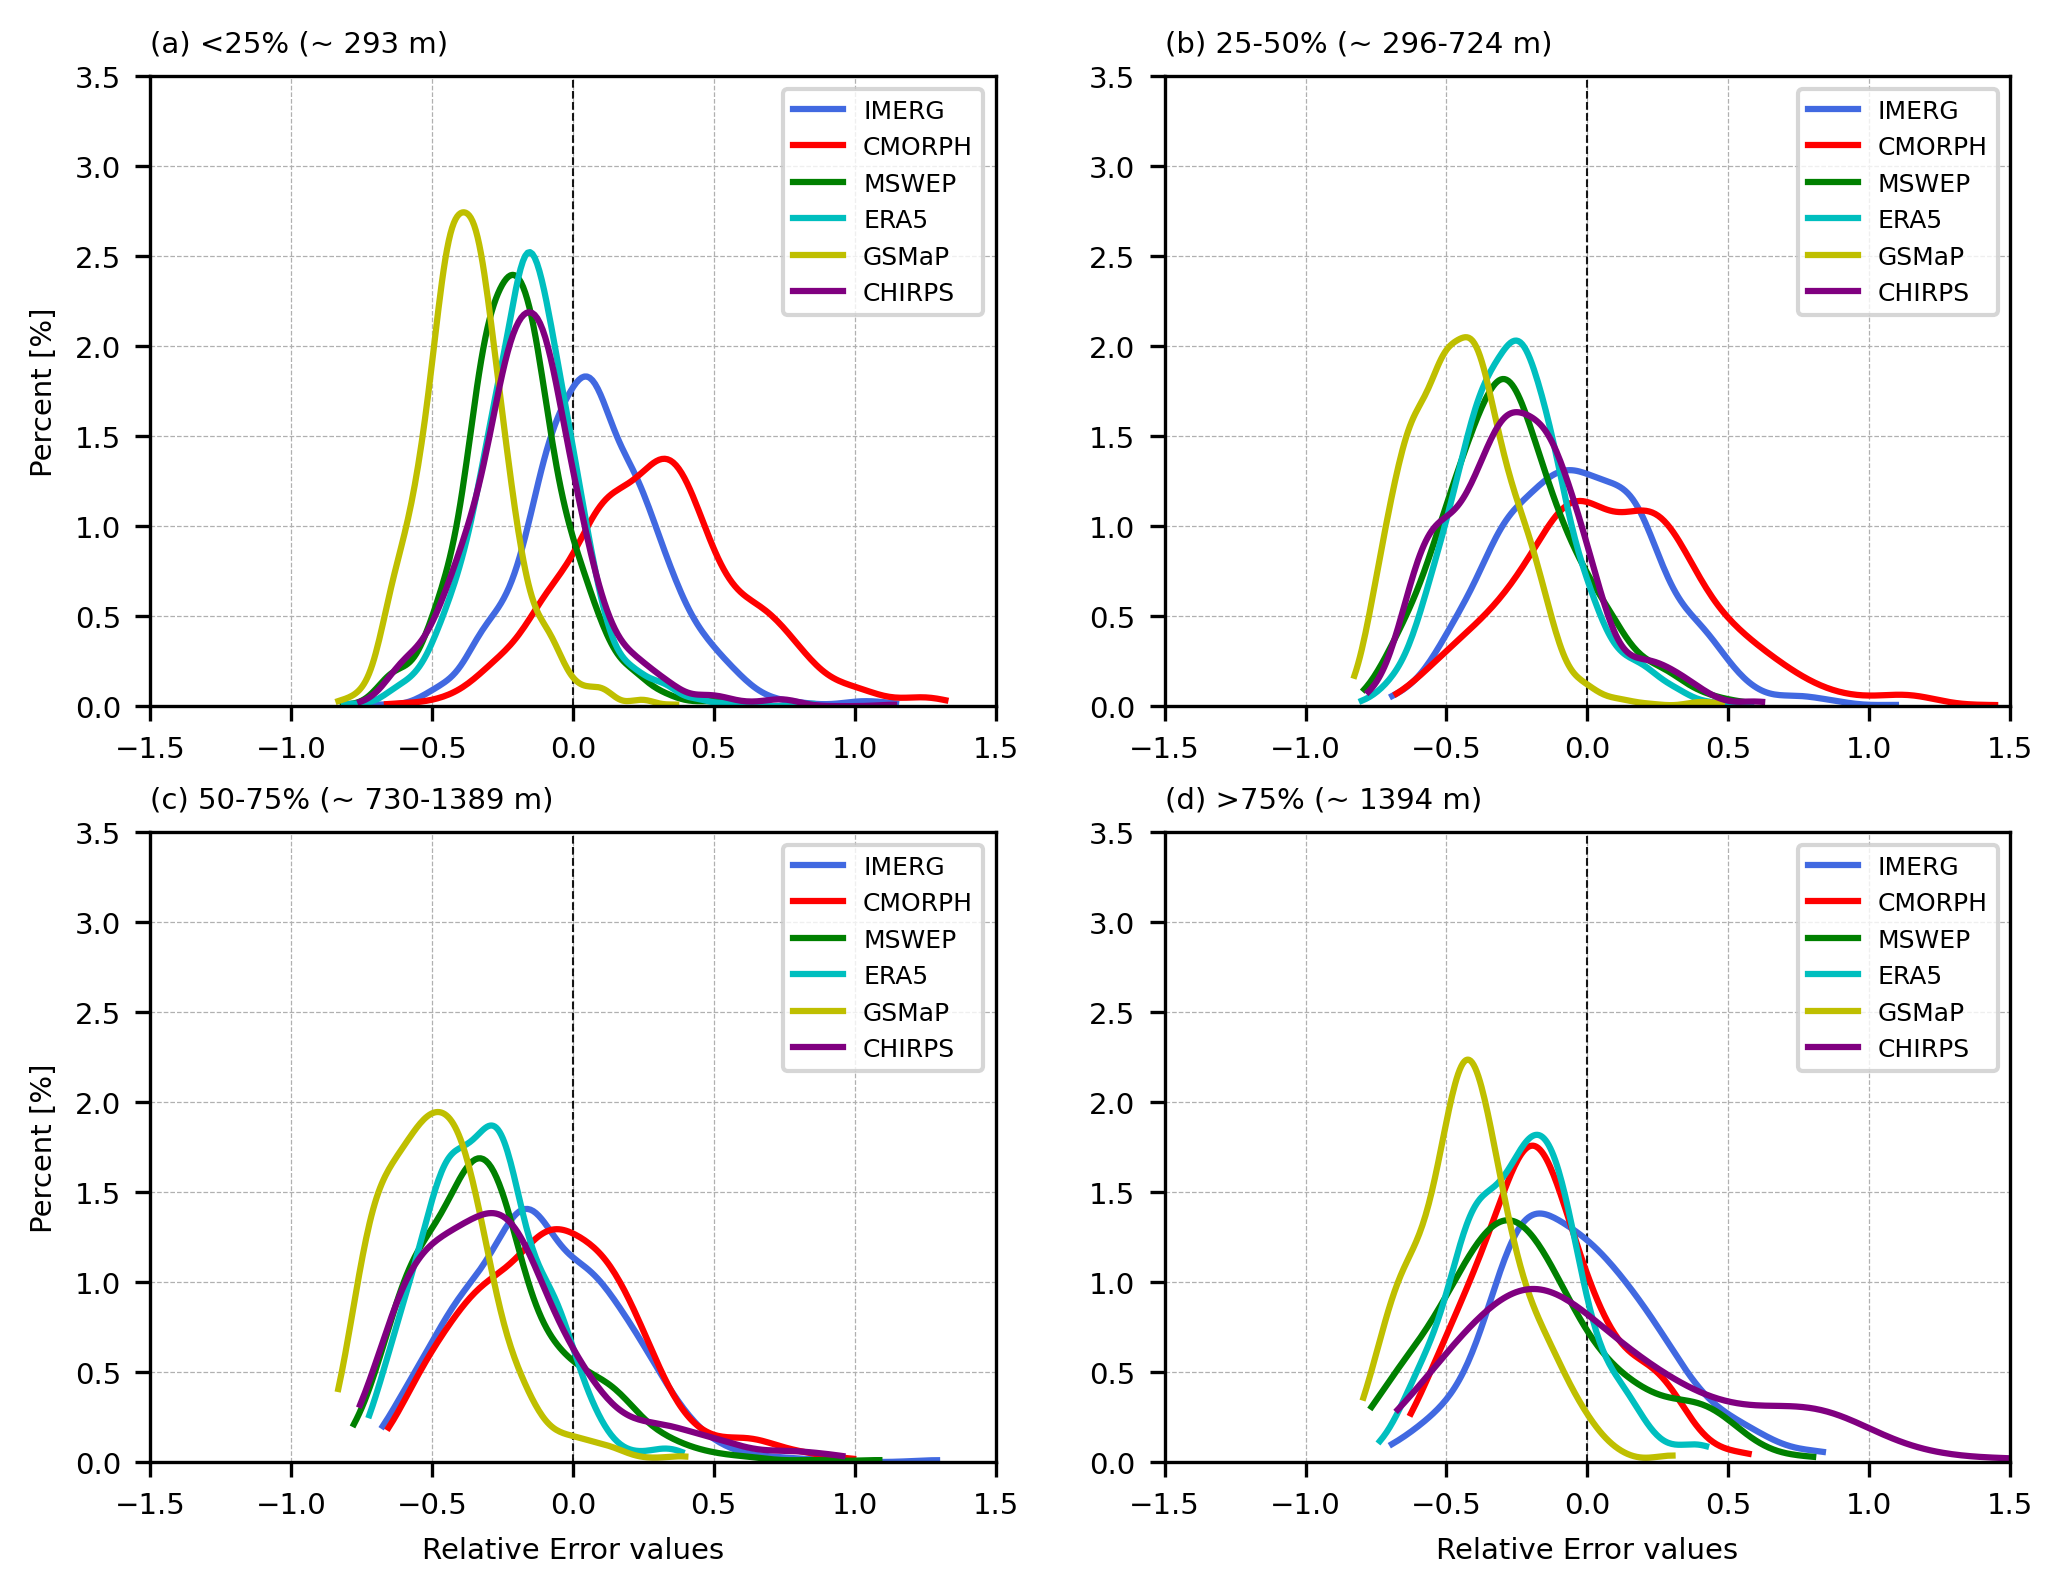

In [26]:
fig = plt.figure(figsize=(8, 6), dpi=300)
gs = gridspec.GridSpec(2, 2)

# ============================================================================================================================
axes = {}
for nrow in range(2):
    for ncol in range(2):
        ax = fig.add_subplot(gs[nrow, ncol])
        ax.legend(fontsize=6, loc=0, ncol=1)
        ax.grid(linewidth=0.3, linestyle='--')
        ax.set_xlim(-1.5,1.5)
        ax.set_ylim(0,3.5)
        ax.tick_params(axis='both', which='major', labelsize=7)
        ax.set_xlabel(' ',fontsize=7)
        if ncol == 0  and nrow < 2:
            ax.set_ylabel('Percent [%]',fontsize=7)
        else:
            ax.set_ylabel(' ',fontsize=7)
        if nrow == 1:
            ax.set_xlabel('Relative Error values',fontsize=7)
        ax.axvline(0, color='k',linestyle='--',linewidth=0.5,alpha=0.9)

        axes[(nrow, ncol)] = ax

# ============================================================================================================================
sns.kdeplot(KMEANS_IMERG[0].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'IMERG',
            clip=(np.nanmin(np.array(KMEANS_IMERG[0].RED)), np.nanmax(np.array(KMEANS_IMERG[0].RED))))
sns.kdeplot(KMEANS_CMORPH[0].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'CMORPH',
            clip=(np.nanmin(np.array(KMEANS_CMORPH[0].RED)), np.nanmax(np.array(KMEANS_CMORPH[0].RED))))
sns.kdeplot(KMEANS_MSWEP[0].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'MSWEP',
            clip=(np.nanmin(np.array(KMEANS_MSWEP[0].RED)), np.nanmax(np.array(KMEANS_MSWEP[0].RED))))
sns.kdeplot(KMEANS_ERA5[0].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'ERA5',
            clip=(np.nanmin(np.array(KMEANS_ERA5[0].RED)), np.nanmax(np.array(KMEANS_ERA5[0].RED))))
sns.kdeplot(KMEANS_GSMaP[0].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'GSMaP',
            clip=(np.nanmin(np.array(KMEANS_GSMaP[0].RED)), np.nanmax(np.array(KMEANS_GSMaP[0].RED))))
sns.kdeplot(KMEANS_CHIRPS[0].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 0)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(KMEANS_CHIRPS[0].RED)), np.nanmax(np.array(KMEANS_CHIRPS[0].RED))))
axes[(0, 0)].legend(fontsize=6, loc=0, ncol=1)
axes[(0, 0)].set_title(f'(a) <25% (~ {int(KMEANS_IMERG[0].ELEV.max())} m)', fontsize=7, loc='left')

# ============================================================================================================================
sns.kdeplot(KMEANS_IMERG[1].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'IMERG',
            clip=(np.nanmin(np.array(KMEANS_IMERG[1].RED)), np.nanmax(np.array(KMEANS_IMERG[1].RED))))
sns.kdeplot(KMEANS_CMORPH[1].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'CMORPH',
            clip=(np.nanmin(np.array(KMEANS_CMORPH[1].RED)), np.nanmax(np.array(KMEANS_CMORPH[1].RED))))
sns.kdeplot(KMEANS_MSWEP[1].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'MSWEP',
            clip=(np.nanmin(np.array(KMEANS_MSWEP[1].RED)), np.nanmax(np.array(KMEANS_MSWEP[1].RED))))
sns.kdeplot(KMEANS_ERA5[1].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'ERA5',
            clip=(np.nanmin(np.array(KMEANS_ERA5[1].RED)), np.nanmax(np.array(KMEANS_ERA5[1].RED))))
sns.kdeplot(KMEANS_GSMaP[1].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'GSMaP',
            clip=(np.nanmin(np.array(KMEANS_GSMaP[1].RED)), np.nanmax(np.array(KMEANS_GSMaP[1].RED))))
sns.kdeplot(KMEANS_CHIRPS[1].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(0, 1)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(KMEANS_CHIRPS[1].RED)), np.nanmax(np.array(KMEANS_CHIRPS[1].RED))))
axes[(0, 1)].legend(fontsize=6, loc=0, ncol=1)
axes[(0, 1)].set_title(f'(b) 25-50% (~ {int(KMEANS_IMERG[1].ELEV.min())}-{int(KMEANS_IMERG[1].ELEV.max())} m)', fontsize=7, loc='left')

# ============================================================================================================================
sns.kdeplot(KMEANS_IMERG[2].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'IMERG',
            clip=(np.nanmin(np.array(KMEANS_IMERG[2].RED)), np.nanmax(np.array(KMEANS_IMERG[2].RED))))
sns.kdeplot(KMEANS_CMORPH[2].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'CMORPH',
            clip=(np.nanmin(np.array(KMEANS_CMORPH[2].RED)), np.nanmax(np.array(KMEANS_CMORPH[2].RED))))
sns.kdeplot(KMEANS_MSWEP[2].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'MSWEP',
            clip=(np.nanmin(np.array(KMEANS_MSWEP[2].RED)), np.nanmax(np.array(KMEANS_MSWEP[2].RED))))
sns.kdeplot(KMEANS_ERA5[2].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'ERA5',
            clip=(np.nanmin(np.array(KMEANS_ERA5[2].RED)), np.nanmax(np.array(KMEANS_ERA5[2].RED))))
sns.kdeplot(KMEANS_GSMaP[2].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'GSMaP',
            clip=(np.nanmin(np.array(KMEANS_GSMaP[2].RED)), np.nanmax(np.array(KMEANS_GSMaP[2].RED))))
sns.kdeplot(KMEANS_CHIRPS[2].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 0)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(KMEANS_CHIRPS[2].RED)), np.nanmax(np.array(KMEANS_CHIRPS[2].RED))))
axes[(1, 0)].legend(fontsize=6, loc=0, ncol=1)
axes[(1, 0)].set_title(f'(c) 50-75% (~ {int(KMEANS_IMERG[2].ELEV.min())}-{int(KMEANS_IMERG[2].ELEV.max())} m)', fontsize=7, loc='left')

# ============================================================================================================================
sns.kdeplot(KMEANS_IMERG[3].RED,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'IMERG',
            clip=(np.nanmin(np.array(KMEANS_IMERG[3].RED)), np.nanmax(np.array(KMEANS_IMERG[3].RED))))
sns.kdeplot(KMEANS_CMORPH[3].RED,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'CMORPH',
            clip=(np.nanmin(np.array(KMEANS_CMORPH[3].RED)), np.nanmax(np.array(KMEANS_CMORPH[3].RED))))
sns.kdeplot(KMEANS_MSWEP[3].RED,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'MSWEP',
            clip=(np.nanmin(np.array(KMEANS_MSWEP[3].RED)), np.nanmax(np.array(KMEANS_MSWEP[3].RED))))
sns.kdeplot(KMEANS_ERA5[3].RED,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'ERA5',
            clip=(np.nanmin(np.array(KMEANS_ERA5[3].RED)), np.nanmax(np.array(KMEANS_ERA5[3].RED))))
sns.kdeplot(KMEANS_GSMaP[3].RED,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'GSMaP',
            clip=(np.nanmin(np.array(KMEANS_GSMaP[3].RED)), np.nanmax(np.array(KMEANS_GSMaP[3].RED))))
sns.kdeplot(KMEANS_CHIRPS[3].RED,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=axes[(1, 1)],label=f'CHIRPS',
            clip=(np.nanmin(np.array(KMEANS_CHIRPS[3].RED)), np.nanmax(np.array(KMEANS_CHIRPS[3].RED))))
axes[(1, 1)].legend(fontsize=6, loc=0, ncol=1)
axes[(1, 1)].set_title(f'(d) >75% (~ {int(KMEANS_IMERG[3].ELEV.min())} m)', fontsize=7, loc='left')


## Taylor Diagram

## Spatial Analysis 

In [27]:
levels = np.arange(-1,1.1,0.1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
scatter_cmap = 'coolwarm_r'

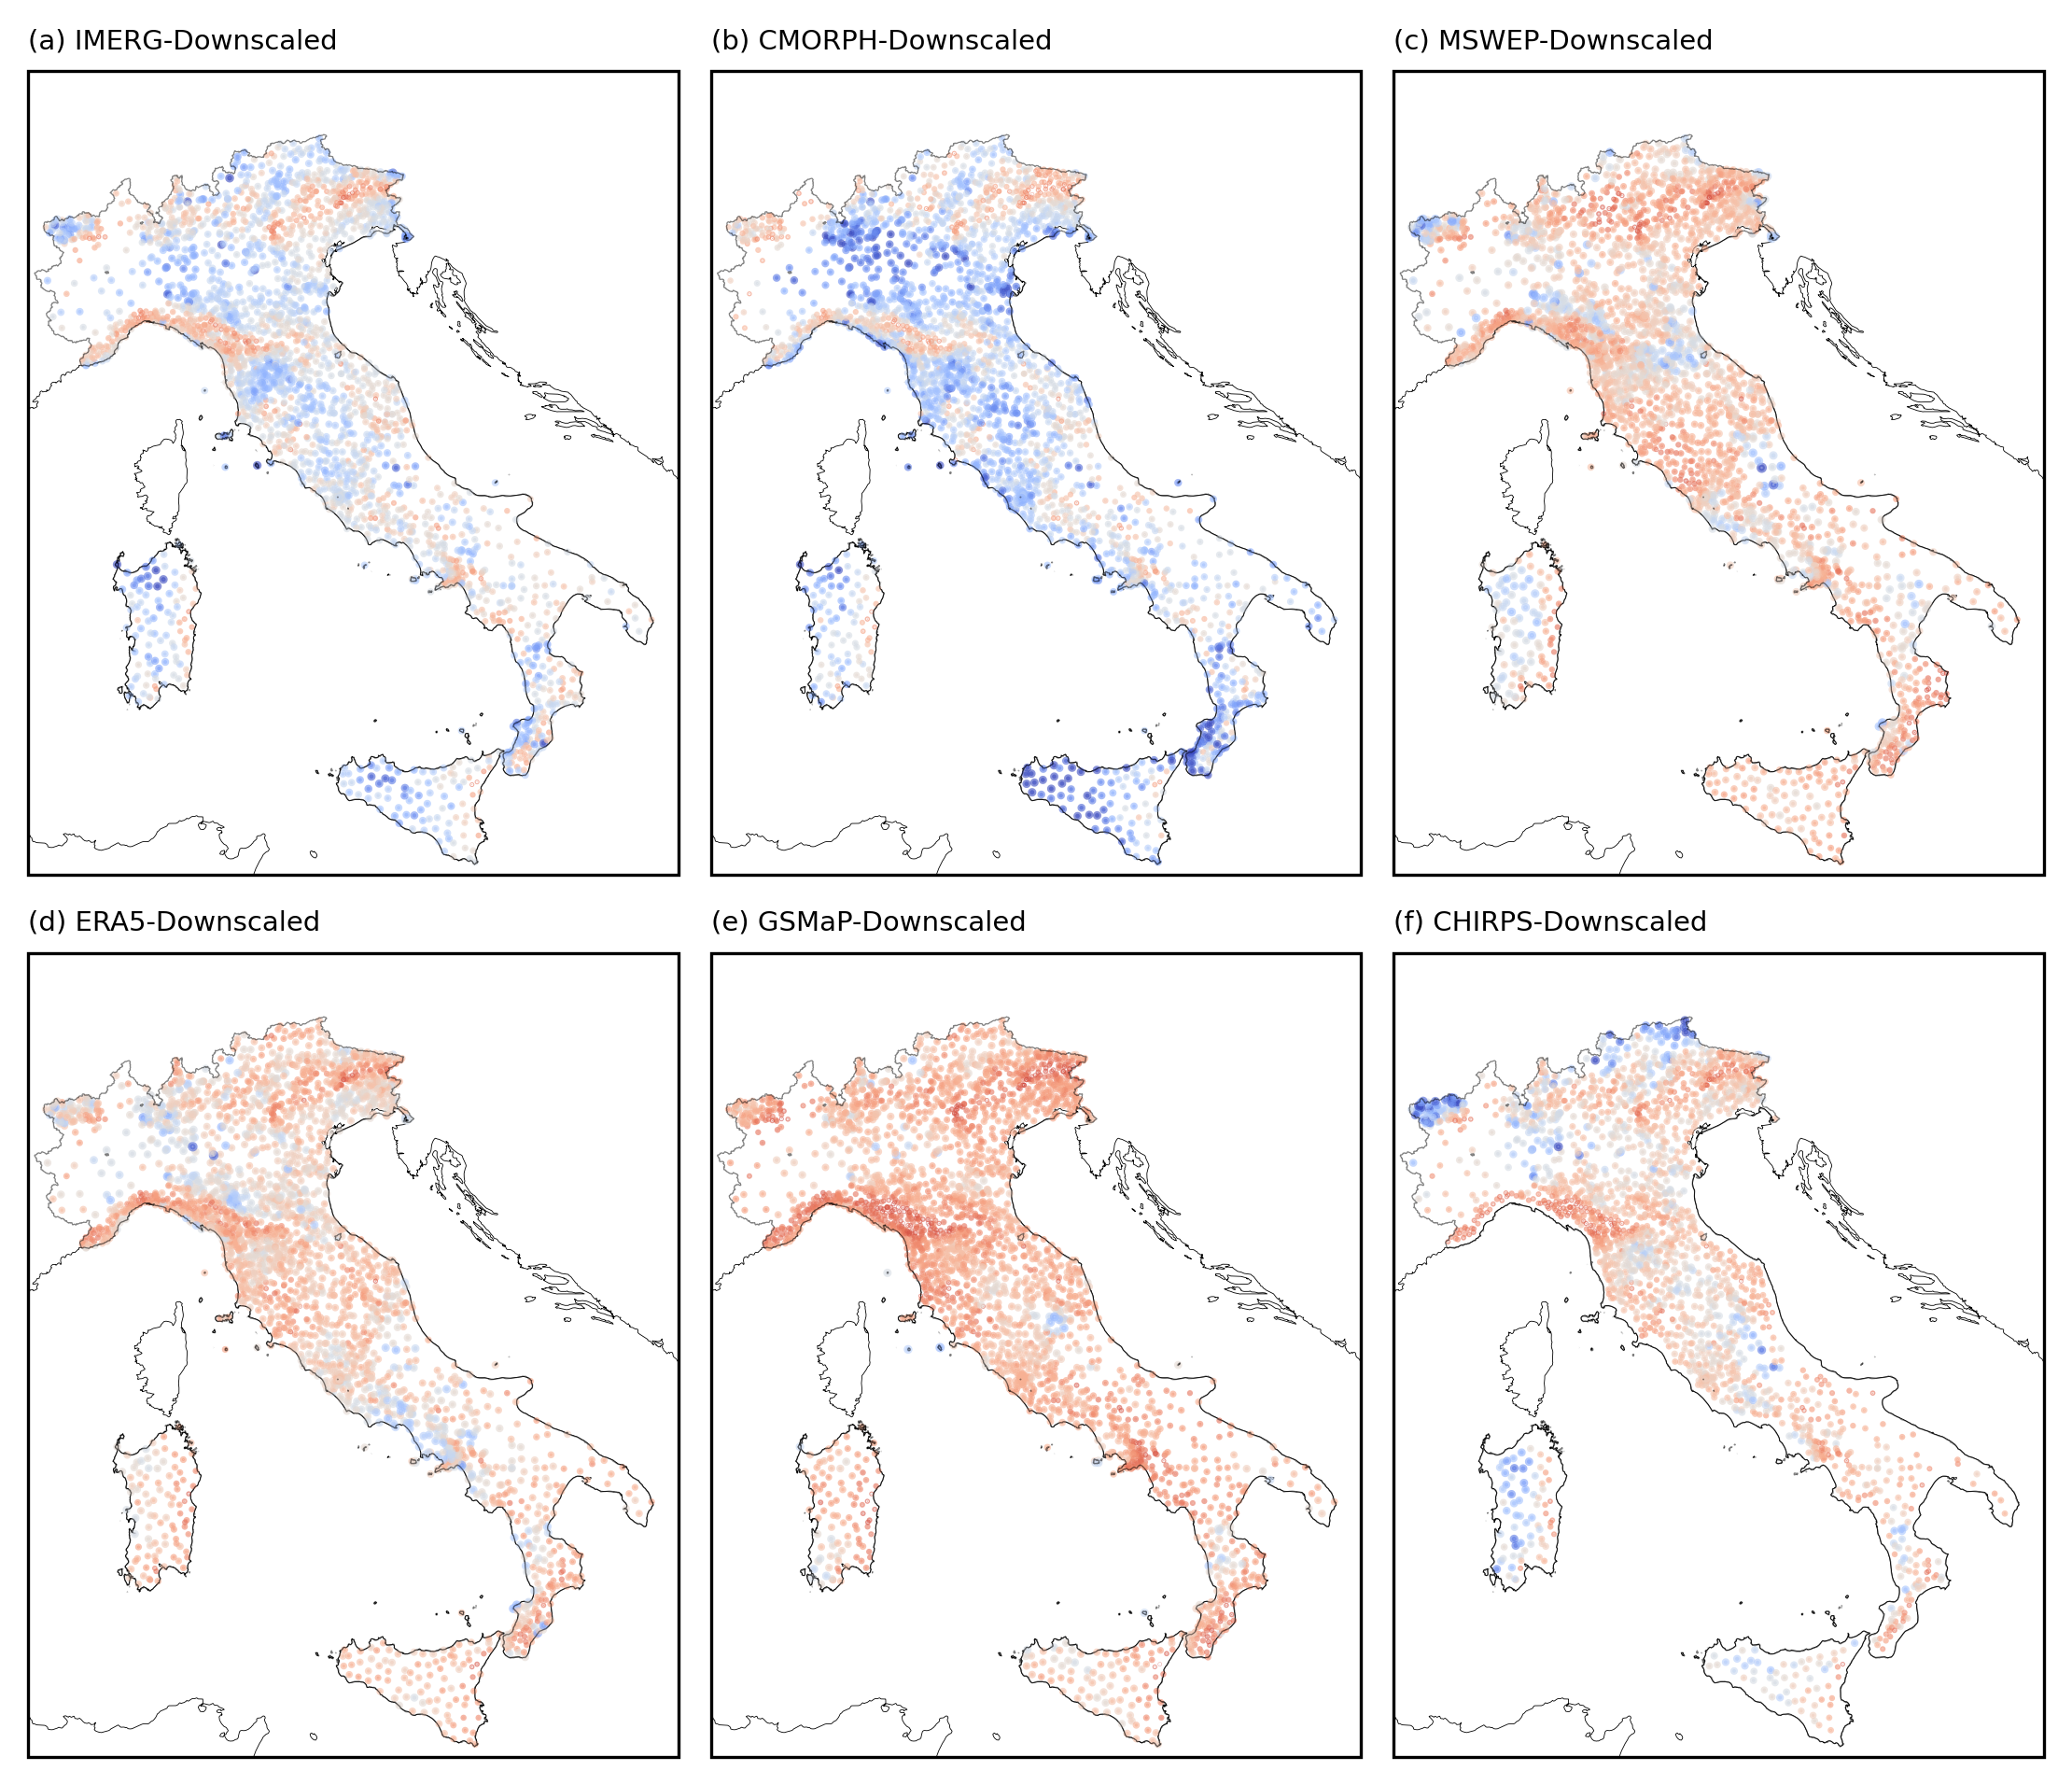

In [28]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8, 7), dpi=300)
gs = gridspec.GridSpec(2, 3)

axes = []
for nraw in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        # DEM.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.1, zorder=21, alpha=0.5)
        ITALY.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.3, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.2)
        axes.append(ax)

for ax, DF, name, letter in zip(axes, DF_LIST, names_list, letters_list):
    mask = (
    DF['RED'].notna() &
    DF['REDn'].notna() &
    DF['LON'].notna() &
    DF['LAT'].notna()
    )

    ax.scatter(
    DF.loc[mask, 'LON'],
    DF.loc[mask, 'LAT'],
    c=DF.loc[mask, 'RED'],
    cmap=scatter_cmap,
    s=np.array(DF.loc[mask, 'REDn']) * 3,
    alpha=0.6,
    norm=norm,
    zorder=20
    )

    ax.set_title(f'{letter} {name}-Downscaled', fontsize=7, loc='left')

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0)